In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
from tensorflow.keras import datasets,layers,models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def preprocess_data(images):
    # Normalize pixel values to be between 0 and 1
    images = images / 255.0
    # Reshape images to fit the model input (28x28x1)
    images = images.reshape((images.shape[0], 28, 28, 1))
    return images
train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

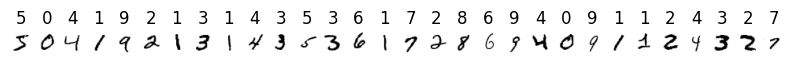

In [4]:
plt.figure(figsize=(10, 1))
for i in range(30):
    plt.subplot(1, 30, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8952 - loss: 0.3346 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9851 - loss: 0.0485 - val_accuracy: 0.9887 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9884 - val_loss: 0.0358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0252 - val_accuracy: 0.9880 - val_loss: 0.0383
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9921 - val_loss: 0.0285


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0369
Test accuracy: 0.9921


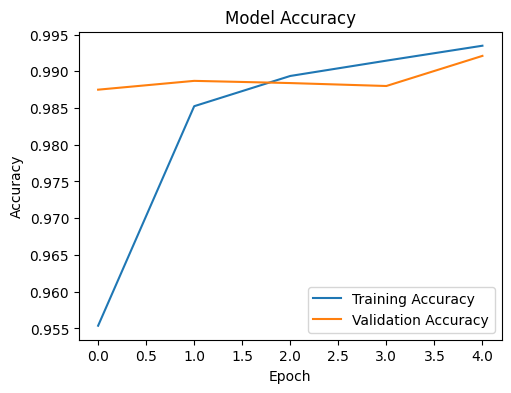

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

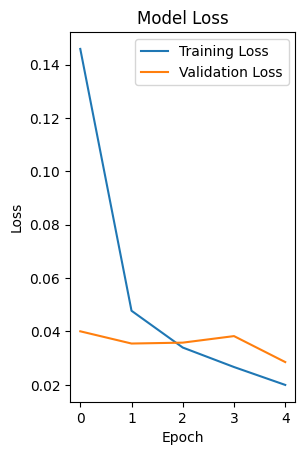

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [13]:
sample_image = test_images[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)
print(f'Predicted digit: {ts.argmax(prediction[0]).numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted digit: 7


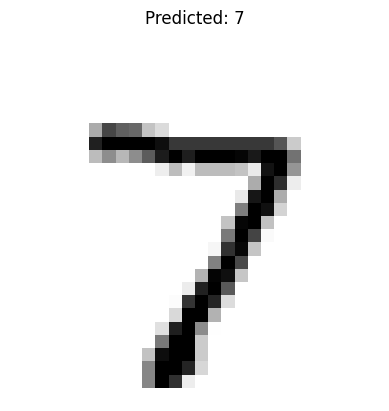

In [14]:
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted: {ts.argmax(prediction[0]).numpy()}')
plt.axis('off')
plt.show()